### How to handle categorical missing values

#### Frequent Category Imputation

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [6]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

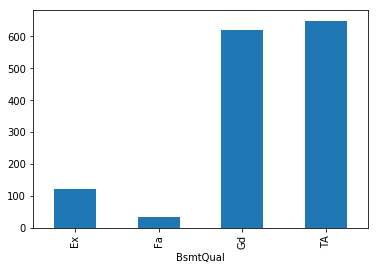

In [11]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

In [12]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

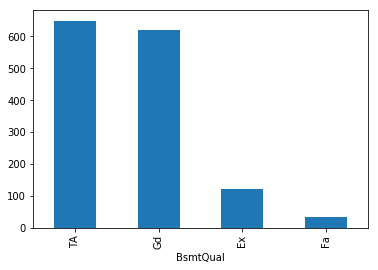

In [13]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

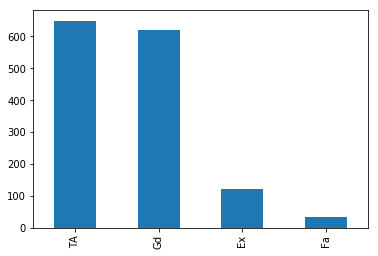

In [14]:
df['BsmtQual'].value_counts().plot.bar()

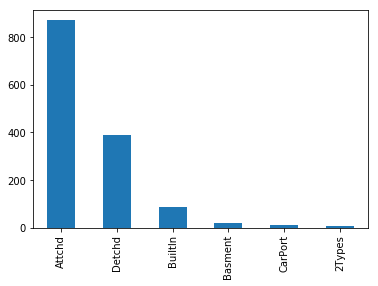

In [15]:
df['GarageType'].value_counts().plot.bar()

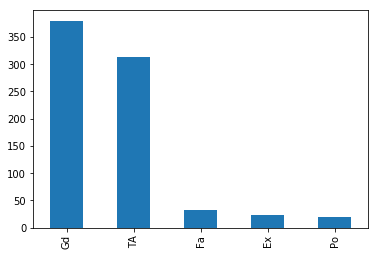

In [16]:
df['FireplaceQu'].value_counts().plot.bar()

In [17]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [23]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [27]:
df['GarageType'].mode()[0]

'Attchd'

In [24]:
def impute_nan(df, variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [25]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [26]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [29]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


#### Advantages
1. Easy to implement
2. Faster way to implement

#### Dis-Advantages
1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many nan's
2. It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [6]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [7]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,0,NaN,Attchd,208500,0
1,0,TA,Attchd,181500,0
2,0,TA,Attchd,223500,0
3,0,Gd,Detchd,140000,0
4,0,TA,Attchd,250000,0


In [8]:
frequent = df['BsmtQual_var'].mode()[0]

In [9]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [10]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,0,NaN,Attchd,208500,0
1,0,TA,Attchd,181500,0
2,0,TA,Attchd,223500,0
3,0,Gd,Detchd,140000,0
4,0,TA,Attchd,250000,0


In [11]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

In [12]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,0,Gd,Attchd,208500,0,1
1,0,TA,Attchd,181500,0,0
2,0,TA,Attchd,223500,0,0
3,0,Gd,Detchd,140000,0,0
4,0,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with new category

In [22]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [23]:
def impute_nan(df, variable):
    df[variable+ "newvar"] = np.where(df[variable].isnull(),"Missing",df[variable])

In [24]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df, feature)

In [25]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [26]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [27]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
